# nutrition required for the person

In [1]:
#formate:name,age,gender,weigth,hight,activity_level
#Total Daily Energy Expenditure(TDEE)
'''
Sedentary (little to no exercise): TDEE x 1.2--------------------------------------------1
Lightly active (light exercise/sports 1-3 days/week): TDEE x 1.375-----------------------2
Moderately active (moderate exercise/sports 3-5 days/week): TDEE x 1.55------------------3
Very active (hard exercise/sports 6-7 days a week): TDEE x 1.725-------------------------4
Extra active (very hard exercise/sports & physical job or 2x training): TDEE x 1.9-------5
'''
#estimate your daily activity based on the above activity 
user_info=['srikar',22,1,65,175,2]

               Calories: 2,000 calories a day for women and 2,500 for men
              Total Fat: 44 to 78 grams a day. 
          Saturated Fat: average man should eat no more than 30g of saturated fat a day. 
                         average woman should eat no more than 20g of saturated fat a day.
    Polyunsaturated Fat: Saturated fat should contribute no more than 10% of your total calories, 
                         or no more than 22g in a 2000-calorie diet.
    Monounsaturated Fat: should make up 15-20% of your calories, or 33-44 grams of a 2000-calorie diet
        Cholesterol(mg): 200 milligrams of cholesterol a day

In [2]:

# Data (example values, replace with actual data)
def plot(user_intake,required):
    nutrients = ['Calories', 'Total Fat(g)', 'Saturated Fat(g)', 'Polyunsaturated Fat(g)', 
                 'Monounsaturated Fat(g)', 'Cholesterol(mg)', 'Sodium(mg)', 
                 'Total Carbohydrates(g)', 'Dietary Fiber(g)', 'Sugars(g)', 
                 'Protein(g)', 'Calcium(mg)', 'Iron(mg)', 'Potassium(mg)']
    intake = user_intake  # Intake values
    min_recommendations = required[0]  # Minimum recommended intake values
    
    # Number of nutrients
    num_nutrients = len(nutrients)
    
    # Width of each bar
    bar_width = 0.35
    
    # Set the positions of the bars on the x-axis
    r1 = np.arange(num_nutrients)
    r2 = [x + bar_width for x in r1]
    
    # Plotting
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.bar(r1, intake, color='b', width=bar_width, edgecolor='grey', label='Intake')
    plt.bar(r2, min_recommendations, color='g', width=bar_width, edgecolor='grey', label='Recommendation')
    
    # Adding labels and title
    plt.xlabel('Nutrients', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(num_nutrients)], nutrients, rotation=45, ha='right')  # Rotate labels for better visibility
    plt.ylabel('Amount')
    plt.title('Nutrient Intake for the Day')
    
    # Adding legend
    plt.legend()
    
    # Show plot
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [3]:
from ultralytics import YOLO
from pathlib import Path 

import cv2
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from rich import print as Print
import pandas as pd

In [4]:
def show_img(img):
    plt.imshow(mpimg.imread(img))
def show_result(result):
    plt.imshow(Image.fromarray(result[0].plot()[:,:,::-1]))

In [5]:
def required_cal(user_data):
    activity=[1.2, 1.375, 1.55, 1.725, 1.9]
    nutrition=[0]*14
    if user_data[2]:
        cal=(10*user_data[3])+(6.25*user_data[4])-(5*user_data[1])+5
        # return cal*activity[user_data[5]-1],user_data[0]
        nutrition[0]=cal
        nutrition[8]=38
        
    else:
        cal=(10*user_data[3])+(6.25*user_data[4])-(5*user_data[1])-161
        # return cal*activity[user_data[5]-1],user_data[0]
        nutrition[0]=cal
        nutrition[8]=25
    nutrition[0]=nutrition[0]*activity[user_data[5]]
    nutrition[1]=nutrition[0]*0.3/9
    nutrition[2]=nutrition[0]*0.1/9
    nutrition[3]=nutrition[0]*0.1/9
    nutrition[4]=nutrition[0]*0.15/9
    nutrition[5]=200
    nutrition[6]=1500
    nutrition[7]=nutrition[0]*0.45/4
    nutrition[9]=nutrition[0]*0.025
    nutrition[10]=nutrition[0]*0.025
    nutrition[11]=1000
    nutrition[12]=8
    nutrition[13]=4700 
    return (nutrition,user_data)

In [6]:

def display_masks_and_area(result):
    data = []  # List to store class name, confidence, and area data
    for r in result:
        img = np.copy(r.orig_img)
        img_name = Path(r.path).stem

        # Create a subplot for each object
        num_objects = len(r)
        fig, axes = plt.subplots(1, num_objects, figsize=(num_objects * 5, 5))

        # Iterate each object contour 
        for ci, c in enumerate(r):
            label = c.names[c.boxes.cls.tolist().pop()]
            confidence = c.boxes.conf.tolist().pop()  # Adjusted this line

            b_mask = np.zeros(img.shape[:2], np.uint8)

            # Create contour mask 
            contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
            _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)

            # Isolate object with black background
            mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
            isolated = cv2.bitwise_and(mask3ch, img)

            # Calculate area
            hull = cv2.convexHull(contour)
            area = cv2.contourArea(hull)
            class_name = label

            # Print and store data
            print(f"Class: {class_name}, Confidence: {confidence}, Object {ci} area (in pixels): {area}")
            data.append([class_name, confidence, area])

            # Display the isolated mask image in subplot
            axes[ci].imshow(cv2.cvtColor(isolated, cv2.COLOR_BGR2RGB))
            axes[ci].set_title(f"Object {ci + 1}")
            axes[ci].axis('off')

        plt.suptitle(f"Isolated Mask Images - {img_name}")
        plt.show()

    return data

In [7]:
def volume(data):
    coin='one-rupee'
    coin_data=[x for x in data if x[0]==coin]
    if not any(coin_data):
        print(f'coin data is not found')
        return
    print(f'coin_data{coin_data}')
    coin_area_ratio=(1.15*3.14*1.15)/coin_data[0][2]
    
    print(f'coin  data :{coin_data}')
    food_data=[x for x in data if x[0]!=coin and x[0]!='chappati']
    vol=[]
    if 'chappati' in data[:][0]:
        print(f'enter the number of chappati\'s')
        depth=int(input())
        vol=vol+[['chappati',depth]]
   
    for item in food_data:
        Print(f'[green]enter the approx depth for {item[0]}')
        depth=int(input())
        
        volume=coin_area_ratio*item[2]*depth
        vol=vol+[[item[0],volume]]
        
    return vol

In [8]:
def nurtition(df,vol):
    if vol is None:
        print('The volume of the input is None')
        return None
    
    item = [(x, np.array(j)) for x in vol 
            for j in df.itertuples(index=False) 
                if x[0] == j[0]]
    
    #  np.concatenate((array1, array2), axis=0)
    result=[[np.concatenate(([j[0]],[float(k)*(float(i[1])*float(j[1])/100) for k in j[2:]]),axis=0)] for i,j in item]
    # result=[np.concatenate(([j[0],[float(k)*(float(i[1])*float(j[1])/100) for k in j[2:]]]),axis=0) for i,j in item]
    return result

In [9]:
def total_nutrition(df):
    numeric_columns=df.columns[1:]
    df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
    df.iloc[:,0]='Total'
    column_sums=df.sum()
    column_sums.iloc[:][0]="Total"
    df_new=pd.DataFrame(column_sums.iloc[:].values.tolist(),df.columns)
    return df_new.transpose()

In [10]:
def pipe_line(img):
    model = YOLO('/Users/srikar/pytorch-test/yolov8/runs/segment/train2/weights/best.pt')
    result=model(img)
    plt.subplot(2, 2, 1)
    show_img(img)
    plt.subplot(2, 2, 2)
    show_result(result)
    # plt.subplot(2, 2, 3)
    data=display_masks_and_area(result)
    plt.show
    vol=volume(data)
    Print(f'[bold][red]vol_data: ',f'[bold][green]{vol} \n',f'[bold][red]data_food_item: ',f'[bold][green]{data}')
    df=pd.read_csv('fullfill.1.0.4.csv')
    test=nurtition(df,vol)
    df_names=np.array(df.columns)
    df_names=np.concatenate(([df_names[0]],df_names[2:]),axis=0)
    test=np.array(test)
    new_test=test.reshape(-1,15)
    test_df=pd.DataFrame(new_test,columns=df_names)
    print('\n\n')
    Print("[bold][purple]The below data contains nutrition data of individul food item")
    print(test_df.head().transpose())
    print('\n\n')
    Print("[bold][purple]The below data contains Total nutrition data present in the food items")
    user_intake=total_nutrition(test_df).values
    print(total_nutrition(test_df).transpose())
    user_data=[0]*6 #name,age,gender,weigth,hight,activity_level
    Print("[bold][green] enter the user name")
    user_data[0]=input()
    Print("[bold][green] enter the user age")
    user_data[1]=int(input())
    Print("[bold][green] enter the user gender(male:1 , female:0)")
    user_data[2]=int(input())
    Print("[bold][green] enter the user weight")
    user_data[3]=int(input())
    Print("[bold][green] enter the user hight")
    user_data[4]=int(input())
    
    
#Sedentary (little to no exercise): TDEE x 1.2--------------------------------------------1
#Lightly active (light exercise/sports 1-3 days/week): TDEE x 1.375-----------------------2
#Moderately active (moderate exercise/sports 3-5 days/week): TDEE x 1.55------------------3
#Very active (hard exercise/sports 6-7 days a week): TDEE x 1.725-------------------------4
#Extra active (very hard exercise/sports & physical job or 2x training): TDEE x 1.9-------5

    Print("[bold][blue]1:","[bold][red] Sedentary (little to no exercise)")
    Print("[bold][blue]2:","[bold][red] Lightly active (light exercise/sports 1-3 days/week)")
    Print("[bold][blue]3:","[bold][red] Moderately active (moderate exercise/sports 3-5 days/week)")
    Print("[bold][blue]4:","[bold][red] Very active (hard exercise/sports 6-7 days a week)")
    Print("[bold][blue]5:","[bold][red] Extra active (very hard exercise/sports & physical job or 2x training)")
    Print("[bold][green] enter the user activity level based on above")
    user_data[5]=int(input())
    required=required_cal(user_data)
    #print(user_data)
    nutrients_c= ['Calories', 'Total Fat(g)', 'Saturated Fat(g)', 'Polyunsaturated Fat(g)', 
                 'Monounsaturated Fat(g)', 'Cholesterol(mg)', 'Sodium(mg)', 
                 'Total Carbohydrates(g)', 'Dietary Fiber(g)', 'Sugars(g)', 
                 'Protein(g)', 'Calcium(mg)', 'Iron(mg)', 'Potassium(mg)']
    print('\n\n')
    Print(f'[bold][purple]The below data contains the required amount of nutrition based on user data')
    for i in range(14):
        Print(f'[bold][red]{nutrients_c[i]}:',f'[bold][green]{required[0][i]}')
    #print(user_intake.reshape(15)[1:],'\n\n',required[0])
    #print('\n\n')
    #plot(user_intake.reshape(15)[1:],required[0])

# the below commad will implement the project

In [ ]:
'''
merican College of Sports Medicine (ACSM) this group give the equation for calculation of the calories based on the 
heart pulse rate which is :
    Women:
    CB = T × (0.4472×H - 0.1263×W + 0.074×A - 20.4022) / 4.184
    
    Men:
    CB = T × (0.6309×H + 0.1988×W + 0.2017×A - 55.0969) / 4.184

where,
    t= time peroid,
    w=weight,
    a= age,
    h=height
'''


image 1/1 /Users/srikar/pytorch-test/yolov8/dataset/valid/images/rice-and-dal1-overlay_jpg.rf.fd166c87c5d275b28d7e892d4695f37b.jpg: 256x256 1 dal-curry, 1 one-rupee, 1 rice, 49.0ms
Speed: 2.9ms preprocess, 49.0ms inference, 10.7ms postprocess per image at shape (1, 3, 256, 256)
Class: one-rupee, Confidence: 0.9141179323196411, Object 0 area (in pixels): 934.0
Class: dal-curry, Confidence: 0.5882079005241394, Object 1 area (in pixels): 13345.5
Class: rice, Confidence: 0.504263162612915, Object 2 area (in pixels): 6619.0


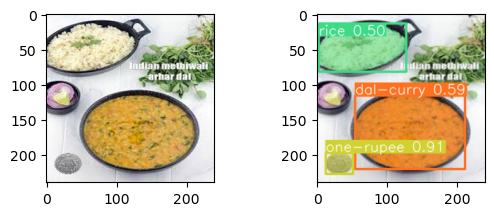

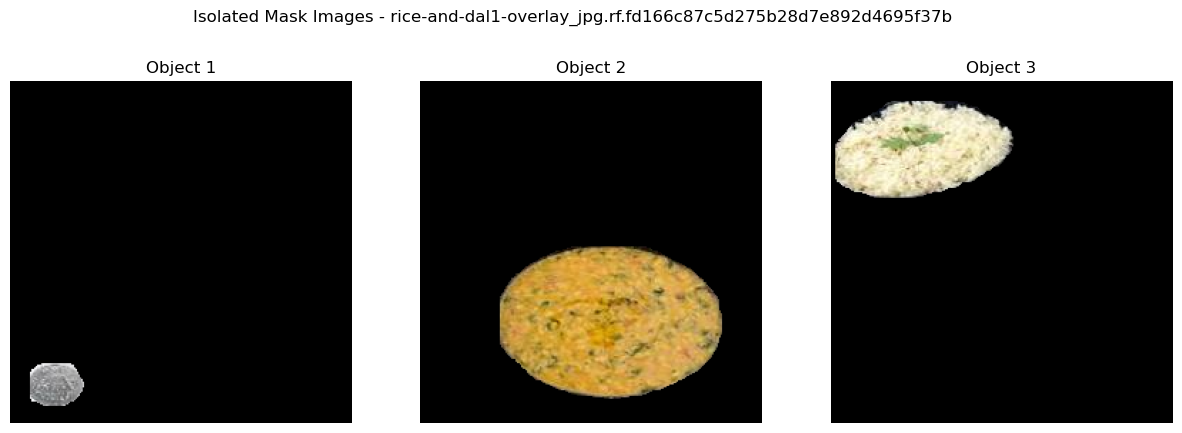

coin_data[['one-rupee', 0.9141179323196411, 934.0]]
coin  data :[['one-rupee', 0.9141179323196411, 934.0]]


enter the approx depth for dal-curry

 3


enter the approx depth for rice

 3


vol_data:  [['dal-curry', 178.00596544432545], ['rice', 88.28605037473233]] 
 data_food_item:  [['one-rupee', 0.9141179323196411, 934.0], ['dal-curry', 0.5882079005241394, 13345.5], ['rice', 
0.504263162612915, 6619.0]]

The below data contains nutrition data of individul food item

                                         0                     1
ITEM*(100gm)                     dal-curry                  rice
Calories                191.60134906110125     72.08944471718543
Total Fat(g)            3.6740431267708775    0.1673903515104925
Saturated Fat(g)        0.5511064690156317  0.055796783836830836
Polyunsaturated Fat(g)  0.5511064690156317  0.055796783836830836
Monounsaturated Fat(g)  2.2044258760625266  0.055796783836830836
Cholesterol(mg)                        0.0                   0.0
Sodium(mg)               372.1805687418899    0.5579678383683083
Total Carbohydrates(g)   29.39234501416702    15.846286609659956
Dietary Fiber(g)        11.205831536651175   0.22318713534732335
Sugars(g)               3.8577452831094217  0.055796783836830836
Protein(g)              12.124342318343896    1.5065131635944327
Calcium(mg)             38.026346362078584     5.635475167519914
Iron(mg)                 4.959958221140685      0.66956140604197
Potassium(mg)            

The below data contains Total nutrition data present in the food items

                                 0
ITEM*(100gm)                 Total
Calories                263.690794
Total Fat(g)              3.841433
Saturated Fat(g)          0.606903
Polyunsaturated Fat(g)    0.606903
Monounsaturated Fat(g)    2.260223
Cholesterol(mg)                0.0
Sodium(mg)              372.738537
Total Carbohydrates(g)   45.238632
Dietary Fiber(g)         11.429019
Sugars(g)                 3.913542
Protein(g)               13.630855
Calcium(mg)              43.661822
Iron(mg)                   5.62952
Potassium(mg)           635.186909


 enter the user name

 srikar


 enter the user age

 20


 enter the user gender(male:1 , female:0)

 1


 enter the user weight

 72


 enter the user hight

 158


1:  Sedentary (little to no exercise)

2:  Lightly active (light exercise/sports 1-3 days/week)

3:  Moderately active (moderate exercise/sports 3-5 days/week)

4:  Very active (hard exercise/sports 6-7 days a week)

5:  Extra active (very hard exercise/sports & physical job or 2x training)

 enter the user activity level based on above

 2


The below data contains the required amount of nutrition based on user data

Calories: 2499.375

Total Fat(g): 83.3125

Saturated Fat(g): 27.770833333333332

Polyunsaturated Fat(g): 27.770833333333332

Monounsaturated Fat(g): 41.65625

Cholesterol(mg): 200

Sodium(mg): 1500

Total Carbohydrates(g): 281.1796875

Dietary Fiber(g): 38

Sugars(g): 62.484375

Protein(g): 62.484375

Calcium(mg): 1000

Iron(mg): 8

Potassium(mg): 4700

In [11]:
im='/Users/srikar/pytorch-test/yolov8/dataset/valid/images/rice-and-dal1-overlay_jpg.rf.fd166c87c5d275b28d7e892d4695f37b.jpg'
pipe_line(im)

In [ ]:
# roti-and-tamato1-overlay_jpg.rf.90d961252b0335ffe5f2993235bae990
im='/Users/srikar/pytorch-test/yolov8/dataset/valid/images/roti-and-tamato1-overlay_jpg.rf.90d961252b0335ffe5f2993235bae990.jpg'

pipe_line(im)
